In [ ]:
"""
Assignment III

Due: June 5, 2022. 
Pick a dataset of your choice. From UCI classification datasets 
(https://archive.ics.uci.edu/ml/datasets.php?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table)
Use the RandomForest method for classification. 
Take from UCI dataset from the clustering section and run k-means algorithm on it. 
Submit:
 1) code in Python 
2)  a word file summarizing the result include some measure of performance such as confusion matrix, and accuracy.

Enjoy!!

"""

In [1]:
#constructing dataframe
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline
#classification
#clustering
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/anime.csv", sep=",")
df['episodes'] = pd.to_numeric(df["episodes"], errors='coerce').fillna(1000).astype(int)
df.episodes[df.episodes <= 25] = 0
df.episodes[df.episodes > 25] = 1
df = df.dropna(how="any")
print("\n")
print(f"The whole dataframe looks like:\n {df}.")
print("\n")
print("The dataframe information is: ")
print(f"{df.info()}.")
print("\n")
print(f"The dataframe shape is: {df.shape}.")
X_all = df.iloc[:, 5:7]
y = df["episodes"]

Mounted at /content/drive


The whole dataframe looks like:
        anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type  episodes  \
0                   D

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


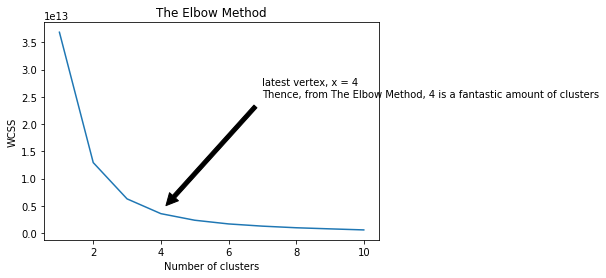

Thence, from The Elbow Method, 4 is a fantastic amount of clusters.


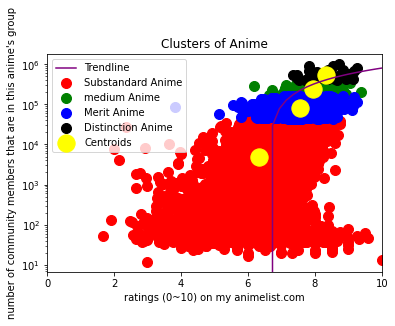

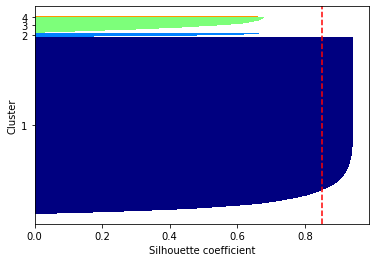

In [6]:
#K-Means
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  k_means = KMeans(n_clusters= i, init = "k-means++", random_state = 42)
  k_means.fit(X_all)
  wcss.append(k_means.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.yscale("linear")
plt.annotate('latest vertex, x = 4\nThence, from The Elbow Method, 4 is a fantastic amount of clusters', xy=(4, 0.4*(10**13)), xytext=(7, 2.5*10**13), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()
print(f"Thence, from The Elbow Method, 4 is a fantastic amount of clusters.")
k_means = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
X_all = np.array(X_all).reshape(-1,2)
y_k_means = k_means.fit_predict(X_all)
plt.scatter(X_all[y_k_means == 0, 0], X_all[y_k_means ==0, 1], s= 100, c= "red", label = "Substandard Anime")
plt.scatter(X_all[y_k_means == 1, 0], X_all[y_k_means ==1, 1], s= 100, c= "green", label = "medium Anime")
plt.scatter(X_all[y_k_means == 2, 0], X_all[y_k_means ==2, 1], s= 100, c= "blue", label = "Merit Anime")
plt.scatter(X_all[y_k_means == 3, 0], X_all[y_k_means ==3, 1], s= 100, c= "black", label = "Distinction Anime")
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], s=300, c = "yellow", label = "Centroids")
plt.title("Clusters of Anime")
plt.xlabel("ratings (0~10) on my animelist.com")
plt.ylabel("number of community members that are in this anime's group")
plt.xscale("linear")
plt.yscale("log")
plt.xlim(0,10)
plt.ylim()
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
array_x = np.array([k_means.cluster_centers_[0,0], k_means.cluster_centers_[1,0], k_means.cluster_centers_[2,0], k_means.cluster_centers_[3,0]])
array_y = np.array([k_means.cluster_centers_[0,1], k_means.cluster_centers_[1,1], k_means.cluster_centers_[2,1], k_means.cluster_centers_[3,1]])
array_x = array_x.reshape(4,1)
array_y = array_y.reshape(4,1)
lin_reg.fit(array_x, array_y)
intercept = lin_reg.intercept_
gradient = lin_reg.coef_
x0 = np.linspace(0,10)
y0 = x0*gradient+intercept
y0 = y0.reshape(50,)
plt.plot(x0,y0,label="Trendline", c='purple')
plt.legend()
plt.show()
#evaluation
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_k_means)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_all, y_k_means, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
	c_silhouette_vals = silhouette_vals[y_k_means == c]
	c_silhouette_vals.sort()
	y_ax_upper += len(c_silhouette_vals)
	color = cm.jet(i / n_clusters)
	plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
	yticks.append((y_ax_lower + y_ax_upper) / 2)
	y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


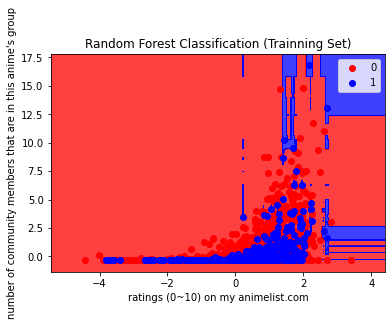

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


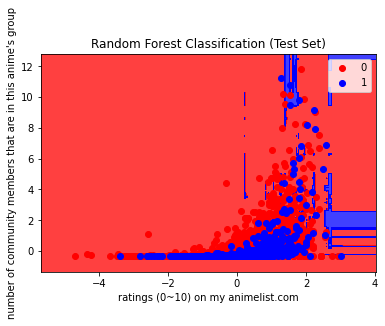

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      5617
           1       0.13      0.31      0.18       392

    accuracy                           0.82      6009
   macro avg       0.54      0.58      0.54      6009
weighted avg       0.89      0.82      0.85      6009



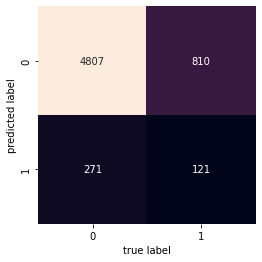

In [5]:
#Random Forest
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size = 0.5, random_state = 0)
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = np.array(X_train).reshape(-1,2)
X_train = sc.fit_transform(X_train)
X_test = np.array(X_test).reshape(-1,2)
X_test = sc.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 500, criterion="entropy", random_state = 0)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
#train set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01), np.arange(start=X_set[:,1].min() -1, stop = X_set[:,1].max() +1, step= 0.01))
plt.contourf(X1, X2, rfc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap= ListedColormap(("red","blue")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(("red", "blue"))(i), label = j)
plt.title("Random Forest Classification (Trainning Set)")
plt.xlabel("ratings (0~10) on my animelist.com")
plt.ylabel("number of community members that are in this anime's group")
plt.legend()
plt.show()
#test set
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01), np.arange(start=X_set[:,1].min() -1, stop = X_set[:,1].max() +1, step= 0.01))
plt.contourf(X1, X2, rfc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap= ListedColormap(("red","blue")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(("red", "blue"))(i), label = j)
plt.title("Random Forest Classification (Test Set)")
plt.xlabel("ratings (0~10) on my animelist.com")
plt.ylabel("number of community members that are in this anime's group")
plt.legend()
plt.show()
#evaluation
from sklearn import metrics
print(metrics.classification_report(y_pred_rfc , y_test))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rfc)
import seaborn as sns 
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()